# Plot to verify agreement between best model and $\zeta$ Ophiuchi observable
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [2]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [3]:
set_plotDefaults()

done in plotDefaults.py


In [4]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_30_M2_17_P100_Z0.01/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/weak_wind/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/do_J_accretion/"
binary = folder+"/binary_to_postRLOF/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

re-run\_exponential


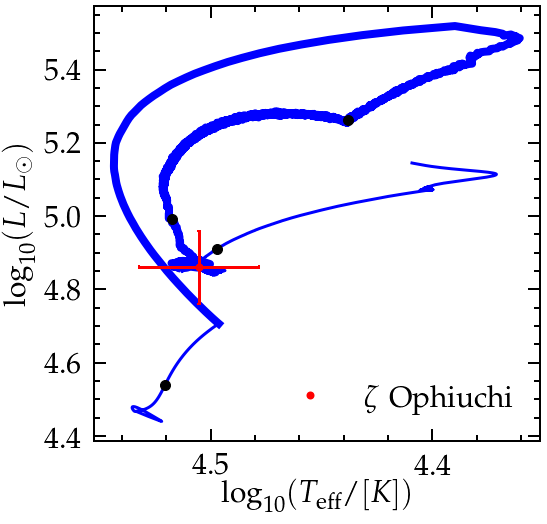

In [114]:
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

plot_HRD(ax, hfile1=hfile1, c="b", hfile2=hfile2, bfile=bfile)
zeta_oph_HRD(ax)
ax.plot(np.nan,np.nan, "ro",label=r"$\zeta \ \mathrm{Ophiuchi}$" )
ax.legend()
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")


LOGS = folder+"binary_to_postRLOF/LOGS2/"
LOGS_single = folder+"accretor_to_TAMS/LOGS/" 
profiles =  [LOGS+'/profile31.data',  # model_number = 1500
             LOGS+'/profile81.data',  # model_number = 4000
             LOGS+'/profile111.data', # model_number = 5500
             LOGS_single+'/profile11.data']

for p in profiles:
    with open(p, "r") as prof:
        for i, line in enumerate(prof):
            if i == 1:
                col = line.split()
                # print(col)
            if i ==2:
                Teff = np.log10(float(line.split()[col.index("Teff")]))
                L  = np.log10(float(line.split()[col.index("photosphere_L")]))
                # print(Teff, L)
                break
            
    ax.scatter(Teff, L, c='k',s=100,zorder=1000)

In [60]:
# get some numbers

# donor TAMS to RLOF delay
# get TAMS age
src, col = getSrcCol(dhfile)
# print(col)
h = src[:, col.index("center_h1")]
t = src[:, col.index("star_age")]*1e-3
iHdepl = h <= 1e-4
t_TAMS = min(t[iHdepl])
# get time of initial RLOF
src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
t = src[:, col.index("age")]*1e-3
iRLOF = rl_relative_gap_1 > 0
t_RLOF_init = min(t[iRLOF])
print("delay donor TAMS and RLOF", f"{t_RLOF_init-t_TAMS}", "1000 yr")
print("TAMS donor", f"{t_TAMS*1e-3:.2f}")


# radial expansion accretor during RLOF
src, col = getSrcCol(hfile1)
radius=src[:, col.index("radius")]
print(min(radius[iRLOF]), max(radius[iRLOF]))

print("RLOF duration", max(t[iRLOF])-min(t[iRLOF]))



delay donor TAMS and RLOF 8.378406434550925 1000 yr
TAMS donor 7.24
7.643018023706905 35.01073553356388
RLOF duration 9.676126523234416


In [28]:
src, col = getSrcCol(bfile)
print(col)
m1 = src[:, col.index("star_1_mass")]
m2 = src[:, col.index("star_2_mass")]

mass_lost = max(m1[iRLOF])-min(m1[iRLOF])
print("total M1 lost", f"{mass_lost:.2f}")
mass_accreted = np.absolute(max(m2[iRLOF])-min(m2[iRLOF]))
print("total M2 accreted", f"{mass_accreted:.2f}")

['model_number', 'age', 'period_days', 'binary_separation', 'v_orb_1', 'v_orb_2', 'rl_1', 'rl_2', 'rl_relative_overflow_1', 'rl_relative_overflow_2', 'star_1_mass', 'star_2_mass', 'lg_mtransfer_rate', 'lg_mstar_dot_1', 'lg_mstar_dot_2', 'lg_system_mdot_1', 'lg_system_mdot_2', 'lg_wind_mdot_1', 'lg_wind_mdot_2', 'fixed_xfer_fraction', 'eff_xfer_fraction', 'J_orb', 'Jdot', 'jdot_mb', 'jdot_gr', 'jdot_ml', 'jdot_ls', 'jdot_missing_wind', 'extra_jdot', 'donor_index', 'point_mass_index']
total M1 lost 10.60
total M2 accreted 3.37


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


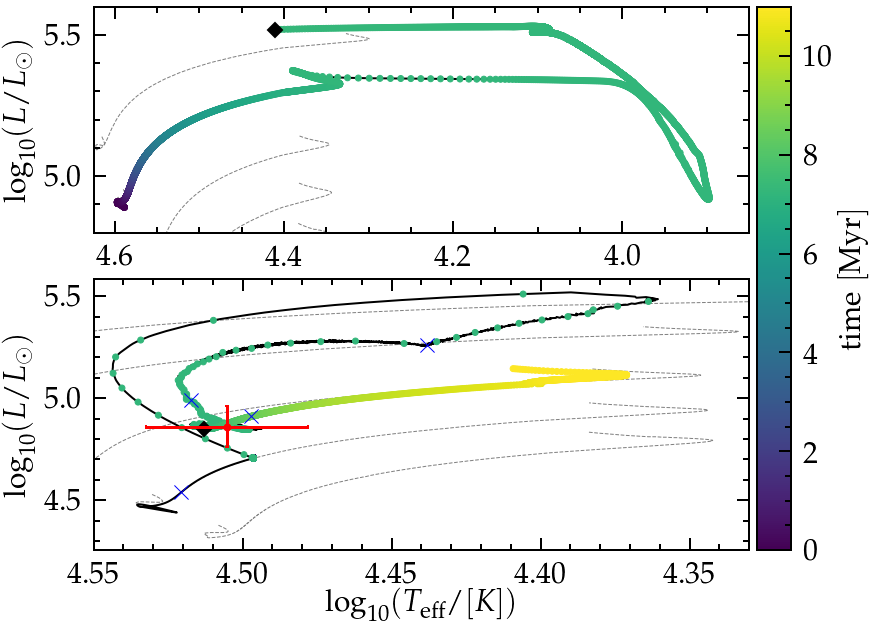

In [10]:
# analize MT
fig = plt.figure(figsize=(12.5,10))
gs = gridspec.GridSpec(120, 100)
ax = fig.add_subplot(gs[:50,:94])
ax2 = fig.add_subplot(gs[60:,:94])
cax = fig.add_subplot(gs[:,95:])


# single stars in the background
root_single  = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01"
single_star_masses = glob.glob(root_single+'/*/')
for ss in single_star_masses:
    h = ss+'/non_rot/LOGS/history.data'
    logL, logTeff = getlogLlogTeff(h)
    ax.plot(logTeff,logL, c="#808080", ls='--', lw=1, zorder=0)
    ax2.plot(logTeff,logL, c="#808080", ls='--', lw=1, zorder=0)

# for time [in Myrs]
vmin=0
vmax=11

# accretor
logL, logTeff = getlogLlogTeff(hfile1)
src, col = getSrcCol(hfile1)

time = src[:, col.index('star_age')]
ax2.plot(logTeff, logL, lw=2, c="k", zorder=0)

# interpolation
# get time of initial RLOF
src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
iRLOF = rl_relative_gap_1 > 0
# interpolate
tx = np.arange(0, max(time[iRLOF]), 50)
logTeff_interp = np.interp(tx, time[iRLOF], logTeff[iRLOF])
logL_interp =  np.interp(tx, time[iRLOF], logL[iRLOF])
p = ax2.scatter(logTeff_interp, logL_interp, c=tx*1e-6, zorder=2,  vmin=vmin, vmax=vmax)
p = ax2.scatter(logTeff[:min(iRLOF)], logL[:min(iRLOF)], c=time[:min(iRLOF)]*1e-6, zorder=2,  vmin=vmin, vmax=vmax)
p = ax2.scatter(logTeff[max(iRLOF):], logL[max(iRLOF):], c=time[max(iRLOF)::min(iRLOF)]*1e-6, zorder=2,  vmin=vmin, vmax=vmax)

# # post-binary
logL, logTeff = getlogLlogTeff(hfile2)
src, col = getSrcCol(hfile2)

time = src[:, col.index('star_age')]
# tx = np.arange(0, max(time), 50)
# logTeff_interp = np.interp(tx, time, logTeff)
# logL_interp =  np.interp(tx, time, logL)

ax2.plot(logTeff[0], logL[0], marker='D', c='k', ms=10)
p = ax2.scatter(logTeff, logL, c=time*1e-6, zorder=2,  vmin=vmin, vmax=vmax)
fig.colorbar(p, label="$\mathrm{time\ [Myr]}$", cax=cax)

zeta_oph_HRD(ax2)

# donor
logL, logTeff = getlogLlogTeff(dhfile)
src, col = getSrcCol(dhfile)

time = src[:, col.index('star_age')]
ax.plot(logTeff, logL, lw=2, c='k', zorder=0)
# tx = np.arange(0, max(time), 50)
# logTeff_interp = np.interp(tx, time, logTeff)
# logL_interp =  np.interp(tx, time, logL)

p = ax.scatter(logTeff, logL, c=time*1e-6, zorder=2,  vmin=vmin, vmax=vmax)
ax.plot(logTeff[-1], logL[-1], marker='D', c='k', ms=10)

# i = np.argmin(np.absolute(time-7.262e6))
# print(time[i])
# ax.plot(logTeff[i], logL[i], marker='*', c='b', ms=10)


# add markers for points for profiles
LOGS = folder+"binary_to_postRLOF/LOGS2/"
LOGS_single = folder+"accretor_to_TAMS/LOGS/" 
profiles =  [LOGS+'/profile31.data',  # model_number = 1500
             LOGS+'/profile81.data',  # model_number = 4000
             LOGS+'/profile111.data', # model_number = 5500
             LOGS_single+'/profile11.data']

for p in profiles:
    with open(p, "r") as prof:
        for i, line in enumerate(prof):
            if i == 1:
                col = line.split()
                # print(col)
            if i ==2:
                Teff = np.log10(float(line.split()[col.index("Teff")]))
                L  = np.log10(float(line.split()[col.index("photosphere_L")]))
                # print(Teff, L)
                break
            
    ax2.scatter(Teff, L, c='b', marker='x', lw=1, s=200,zorder=10)


ax.set_xlim(xmax=4.625,xmin=3.85)
ax.set_ylim(4.8,5.6)
ax2.set_xlim(xmax=4.55,xmin=4.33)
ax.invert_xaxis()
ax2.invert_xaxis()
ax2.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
ax2.set_ylabel(r"$\log_{10}(L/L_\odot)$")
# ax2.set_yticklabels([])
# ax2.set_xticklabels([])

fig.align_labels()
fig.savefig("/mnt/home/mrenzo/TMP/HRD_both.pdf", dpi=10)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


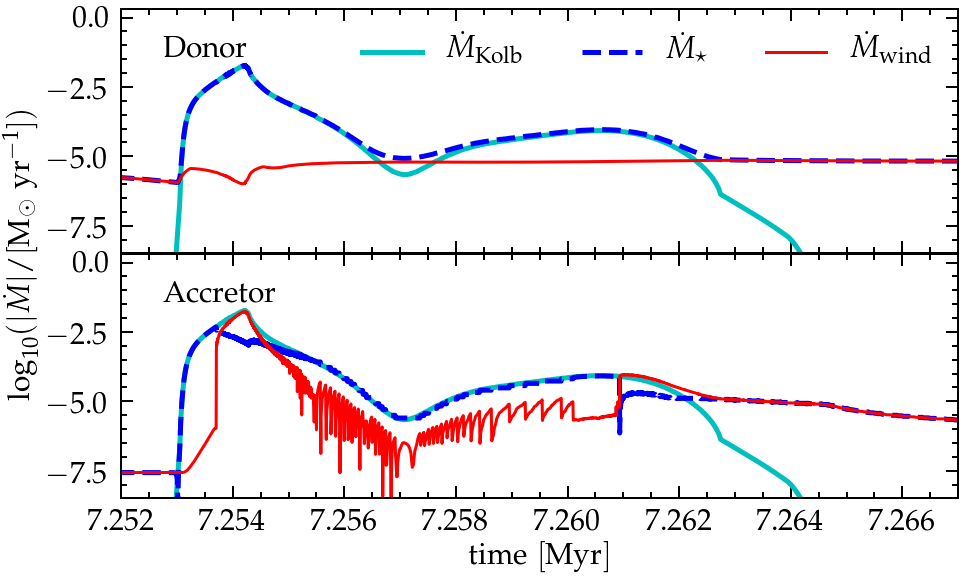

In [62]:
# mass transfer rate
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[50:,:])
bx = fig.add_subplot(gs[:50,:])

src, col = getSrcCol(bfile)
lg_mtransfer_rate = src[:, col.index('lg_mtransfer_rate')]
lg_mstar_dot_1 = src[:, col.index('lg_mstar_dot_1')]
lg_mstar_dot_2 = src[:, col.index('lg_mstar_dot_2')]
lg_system_mdot_1 = src[:, col.index('lg_system_mdot_1')]
lg_system_mdot_2 = src[:, col.index('lg_system_mdot_2')]
lg_wind_mdot_1 = src[:, col.index('lg_wind_mdot_1')]
lg_wind_mdot_2 = src[:, col.index('lg_wind_mdot_2')]
t = src[:, col.index("age")]*1e-6
# t = np.log10(t[-1]-t)

ax.plot(t, lg_mtransfer_rate, lw=5, c='c')
bx.plot(t, lg_mtransfer_rate, lw=5, c='c', label="$\dot M_\mathrm{Kolb}$")

ax.plot(t, lg_mstar_dot_2, lw=5, ls='--', c='b')
bx.plot(t, lg_mstar_dot_1, lw=5, ls='--', c='b', label="$\dot M_\star$")

ax.plot(t, lg_wind_mdot_2, c='r')
bx.plot(t, lg_wind_mdot_1, c='r', label=r"$\dot M_\mathrm{wind}$")

bx.legend(ncol=3)

ax.text(0.05,0.8, "$\mathrm{Accretor}$", fontsize=30, transform=ax.transAxes)
bx.text(0.05,0.8, "$\mathrm{Donor}$", fontsize=30, transform=bx.transAxes)



ax.set_ylabel(r"$\log_{10}(|\dot{M}|/\mathrm{[M_\odot \ yr^{-1}]})$",  horizontalalignment='center', y=1.)
#ax.set_xlim(xmin=5.72, xmax=5.74)
# ax.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t \ \mathrm{[yr]})$")
ax.set_xlabel(r"$\mathrm{time} \ \mathrm{[Myr]}$")
bx.set_xlabel("")
bx.set_xticklabels([])
ax.set_xlim(xmin=7.252, xmax=7.267)
ax.set_ylim(-8.5,0.3)
bx.set_xlim(ax.get_xlim())
bx.set_ylim(ax.get_ylim())
plt.savefig("/mnt/home/mrenzo/TMP/MT.pdf")



In [ ]:
# chemical composition
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

final_h1, final_he4, final_n14, final_c12, final_o16 = plot_surface_abundances(hfile1, hfile2, ax=ax)
ax.legend(handlelength=0.5, columnspacing=0.75, handletextpad=0.5, ncol=3, loc="best", fontsize=20)
ax.set_yscale('log')
ax.set_xlim(0,11.7)
print(f"{final_h1:0.5f}", f"{final_he4:0.5f}", f"{final_n14:0.5f}", f"{final_c12:0.5f}", f"{final_o16:0.5f}")
# plt.savefig("/mnt/home/mrenzo/TMP/composition_zeta.pdf")

Text(0, 0.5, '$v_\\mathrm{rot} \\ \\mathrm{[km\\ s^{-1}]}$')

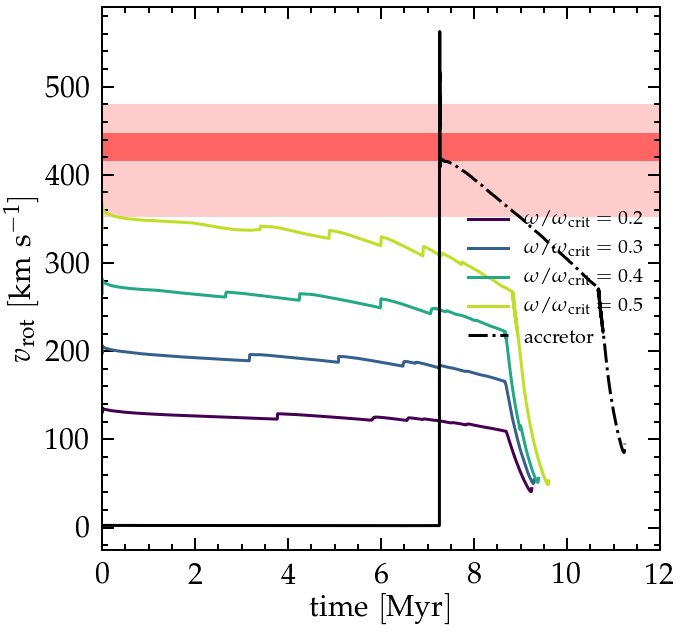

In [26]:
# surface rotation rate
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# overplo single rotating stars
folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/"]
colors = plt.cm.viridis(np.linspace(0,0.9,len(folders)))
for f in folders:
    plot_surface_rotation_time(ax, hfile1=f+'/history.data',c=colors[folders.index(f)], hfile2="")
    label = "$\omega/\omega_\mathrm{crit}="+str(f.split('/')[-3].split('_')[1])+"$"
    ax.plot(np.nan, np.nan, ls="-",c=colors[folders.index(f)], label=label)


plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2) #, label="Z=0.01")
# t, v = get_surface_rotation_time(hfile1)
# src, col = getSrcCol(hfile1)
# modnum = src[:, col.index("model_number")]
# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# t, v = get_surface_rotation_time(hfile2)
# src, col = getSrcCol(hfile2)
# modnum = src[:, col.index("model_number")]

# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
ax.plot(np.nan, np.nan,c='k', ls="-.", label="$\mathrm{accretor}$")
# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
ax.set_xlim(0, 12)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+3*err_vsini], facecolor='r', alpha=0.2, zorder=1)
ax.legend(loc="center right", fontsize=30)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")
# plt.savefig("/mnt/home/mrenzo/TMP/zeta_rot.pdf")

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/../exponential_ov/binary_to_donor_Hedepl/


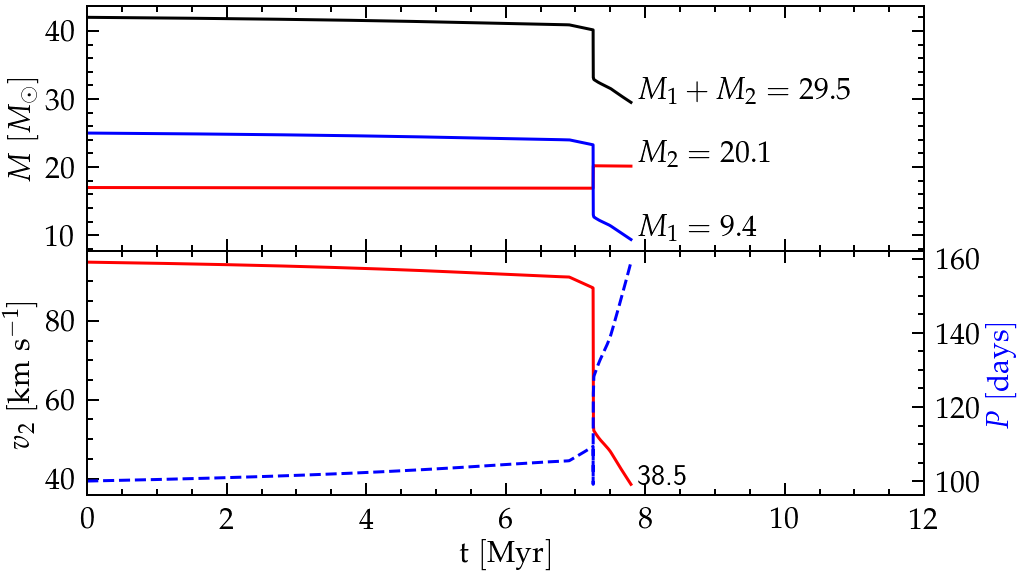

In [6]:
# orbital evolution
binary = folder+"../exponential_ov/binary_to_donor_Hedepl/"
MassVelocityEvolution(binary, figName="")

N.B: The kippenhahn diagrams do not show rotational mixing!!

172.5


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.


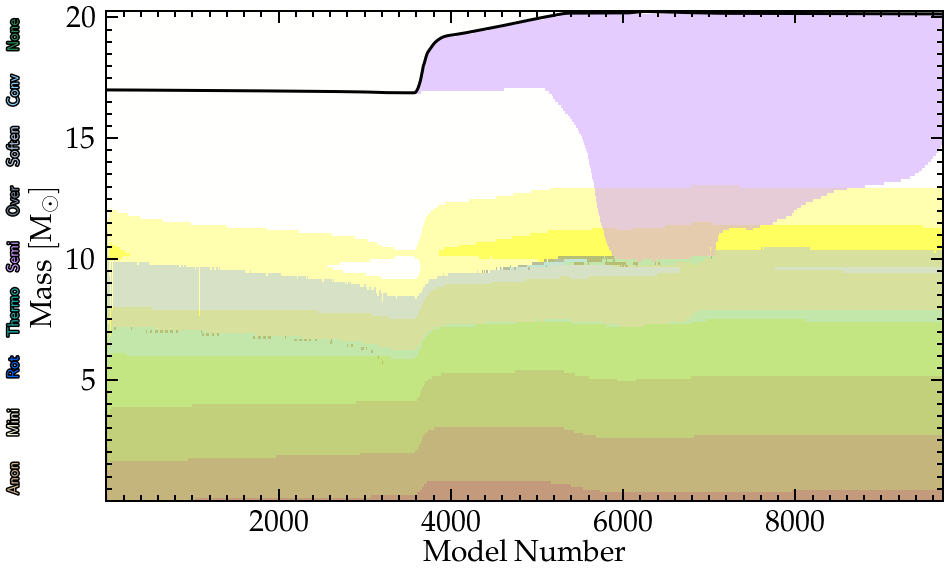

In [12]:
# Kippenhahn diagram
binary = folder+"../exponential_ov/binary_to_donor_Hedepl/"

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x =  'model_number' #
y =  'mass' #'radius' # 

mmm.loadHistory(f=binary+'/LOGS2')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56',
             # age_lookback=True,
             age_log=True,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)

plt.savefig("/mnt/home/mrenzo/TMP/kipp_mass.pdf")

In [ ]:
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x = 'model_number' # 'star_age' #
y = 'mass' # 'radius' #

mmm.loadHistory(f=binary+'/LOGS1/')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56',
             # age_lookback=True,
             age_log=False,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)
ax.set_ylim(ymin=12, ymax=13)

In [ ]:
src, col = getSrcCol(hfile2)
mix_type1 = src[:, col.index("mix_type_1")]
mix_type2 = src[:, col.index("mix_type_2")]
mix_type3 = src[:, col.index("mix_type_3")]
mix_type4 = src[:, col.index("mix_type_4")]
mix_type5 = src[:, col.index("mix_type_5")]
mix_type6 = src[:, col.index("mix_type_6")]
mix_type7 = src[:, col.index("mix_type_7")]
mix_type8 = src[:, col.index("mix_type_8")]
mix_type9 = src[:, col.index("mix_type_9")]
mix_type10 = src[:, col.index("mix_type_10")]
mix_type11 = src[:, col.index("mix_type_11")]
mix_type12 = src[:, col.index("mix_type_12")]
mix_type13 = src[:, col.index("mix_type_13")]
mix_type14 = src[:, col.index("mix_type_14")]
mix_type15 = src[:, col.index("mix_type_15")]
mix_type16 = src[:, col.index("mix_type_16")]
mix_type17 = src[:, col.index("mix_type_17")]
mix_type18 = src[:, col.index("mix_type_18")]
mix_type19 = src[:, col.index("mix_type_19")]
mix_type20 = src[:, col.index("mix_type_20")]
t = src[:, col.index("model_number")]

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


ax.scatter(t,mix_type1)
ax.scatter(t,mix_type2)
ax.scatter(t,mix_type3)
ax.scatter(t,mix_type4)
ax.scatter(t,mix_type5)
ax.scatter(t,mix_type6)
ax.scatter(t,mix_type7)
ax.scatter(t,mix_type8)
ax.scatter(t,mix_type9)
ax.scatter(t,mix_type10)
ax.scatter(t,mix_type11)
ax.scatter(t,mix_type12)
ax.scatter(t,mix_type13)
ax.scatter(t,mix_type14)
ax.scatter(t,mix_type15)
ax.scatter(t,mix_type16)
ax.scatter(t,mix_type17)
ax.scatter(t,mix_type18)
ax.scatter(t,mix_type19)
ax.scatter(t,mix_type20)

ax.set_xlabel(r"model number")
ax.set_ylabel(r"mix type")
ax.axhline(5)



In [ ]:
# spectroscopic HRD
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
plot_spectroscopic_HRD(ax, hfile1, c='k', hfile2=hfile2, label=model_name)
zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")